In [2]:
import torch
model_path = '/data/jongseo/project/cil/CODA_video/ssv2_1600.pth'
model = torch.load(model_path,map_location='cpu')
# print(model)

In [7]:
for i in model['model'].keys():
    print(i)

mask_token
encoder.patch_embed.proj.weight
encoder.patch_embed.proj.bias
encoder.blocks.0.norm1.weight
encoder.blocks.0.norm1.bias
encoder.blocks.0.attn.q_bias
encoder.blocks.0.attn.v_bias
encoder.blocks.0.attn.qkv.weight
encoder.blocks.0.attn.proj.weight
encoder.blocks.0.attn.proj.bias
encoder.blocks.0.norm2.weight
encoder.blocks.0.norm2.bias
encoder.blocks.0.mlp.fc1.weight
encoder.blocks.0.mlp.fc1.bias
encoder.blocks.0.mlp.fc2.weight
encoder.blocks.0.mlp.fc2.bias
encoder.blocks.1.norm1.weight
encoder.blocks.1.norm1.bias
encoder.blocks.1.attn.q_bias
encoder.blocks.1.attn.v_bias
encoder.blocks.1.attn.qkv.weight
encoder.blocks.1.attn.proj.weight
encoder.blocks.1.attn.proj.bias
encoder.blocks.1.norm2.weight
encoder.blocks.1.norm2.bias
encoder.blocks.1.mlp.fc1.weight
encoder.blocks.1.mlp.fc1.bias
encoder.blocks.1.mlp.fc2.weight
encoder.blocks.1.mlp.fc2.bias
encoder.blocks.2.norm1.weight
encoder.blocks.2.norm1.bias
encoder.blocks.2.attn.q_bias
encoder.blocks.2.attn.v_bias
encoder.blocks.2.

In [1]:
import clip
clip_model, preprocess = clip.load("ViT-B/16", device="cpu")
pretrain_dict = clip_model.visual.state_dict()
del clip_model
del pretrain_dict['proj']

In [21]:
from timm.models import vit_base_patch16_224

load_dict = vit_base_patch16_224(pretrained=True).state_dict()
del load_dict['head.weight']; del load_dict['head.bias']
del load_dict['cls_token']
del load_dict['pos_embed']
del load_dict['patch_embed.proj.weight']
del load_dict['patch_embed.proj.bias']
del load_dict['norm.bias']
del load_dict['norm.weight']




In [2]:
from models.clip_video import CLIP_video
CLIP_model = CLIP_video(img_size=224, patch_size=16, embed_dim=768, depth=12,
                                        num_heads=12, ckpt_layer=0,
                                        drop_path_rate=0, frame_prompt=False)
print(pretrain_dict.keys())

/data/jongseo/anaconda3/envs/cil/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


odict_keys(['class_embedding', 'positional_embedding', 'conv1.weight', 'ln_pre.weight', 'ln_pre.bias', 'transformer.resblocks.0.attn.in_proj_weight', 'transformer.resblocks.0.attn.in_proj_bias', 'transformer.resblocks.0.attn.out_proj.weight', 'transformer.resblocks.0.attn.out_proj.bias', 'transformer.resblocks.0.ln_1.weight', 'transformer.resblocks.0.ln_1.bias', 'transformer.resblocks.0.mlp.c_fc.weight', 'transformer.resblocks.0.mlp.c_fc.bias', 'transformer.resblocks.0.mlp.c_proj.weight', 'transformer.resblocks.0.mlp.c_proj.bias', 'transformer.resblocks.0.ln_2.weight', 'transformer.resblocks.0.ln_2.bias', 'transformer.resblocks.1.attn.in_proj_weight', 'transformer.resblocks.1.attn.in_proj_bias', 'transformer.resblocks.1.attn.out_proj.weight', 'transformer.resblocks.1.attn.out_proj.bias', 'transformer.resblocks.1.ln_1.weight', 'transformer.resblocks.1.ln_1.bias', 'transformer.resblocks.1.mlp.c_fc.weight', 'transformer.resblocks.1.mlp.c_fc.bias', 'transformer.resblocks.1.mlp.c_proj.weigh

In [3]:
import torch

# def transfer_clip_weights_to_vit(clip_model, vit_model):
    # CLIP에서 ViT로 가중치를 옮기기 위한 매핑 딕셔너리 생성
weight_mapping = {
    'ln_1.weight': 'norm1.weight',
    'ln_1.bias': 'norm1.bias',
    'ln_2.weight': 'norm2.weight',
    'ln_2.bias': 'norm2.bias',
    'attn.in_proj_weight': 'attn.qkv.weight',
    'attn.in_proj_bias': 'attn.qkv.bias',
    'attn.out_proj.weight': 'attn.proj.weight',
    'attn.out_proj.bias': 'attn.proj.bias',
    'mlp.c_fc.weight': 'mlp.fc1.weight',
    'mlp.c_fc.bias': 'mlp.fc1.bias',
    'mlp.c_proj.weight': 'mlp.fc2.weight',
    'mlp.c_proj.bias': 'mlp.fc2.bias',
}

# CLIP 모델의 state_dict을 가져옴
clip_state_dict = pretrain_dict

# 새로운 state_dict을 생성하여 ViT 모델에 맞게 가중치 이름을 변경
new_state_dict = {}
for name, param in clip_state_dict.items():
    # 가중치 이름 변환
    if name.startswith('transformer'):
        for clip_name, vit_name in weight_mapping.items():
            if clip_name in name:
                # 이름의 나머지 부분도 매핑되도록 조정 (예: transformer.resblocks.0.ln_1.weight -> module.feat.blocks.0.norm1.weight)
                new_name = name.replace(clip_name, vit_name)
                new_name = new_name.replace("transformer.resblocks", "blocks")
                new_state_dict[new_name] = param
                break
    else:
        new_state_dict[name] = param

    # ViT 모델의 state_dict을 새로운 가중치로 업데이트
CLIP_model.load_state_dict(new_state_dict, strict=False)

    # return vit_model

# CLIP과 ViT 모델 초기화 (예시로 사용, 실제 모델 로드 코드는 다를 수 있음)
# clip_model = ... # CLIP 모델 로드
# vit_model = ... # ViT 모델 로드

# 가중치 전송


_IncompatibleKeys(missing_keys=['temporal_embedding'], unexpected_keys=[])

In [40]:
for key in new_state_dict.keys():
    print(key)

class_embedding
positional_embedding
conv1.weight
ln_pre.weight
ln_pre.bias
blocks.0.attn.qkv.weight
blocks.0.attn.qkv.bias
blocks.0.attn.proj.weight
blocks.0.attn.proj.bias
blocks.0.norm1.weight
blocks.0.norm1.bias
blocks.0.mlp.fc1.weight
blocks.0.mlp.fc1.bias
blocks.0.mlp.fc2.weight
blocks.0.mlp.fc2.bias
blocks.0.norm2.weight
blocks.0.norm2.bias
blocks.1.attn.qkv.weight
blocks.1.attn.qkv.bias
blocks.1.attn.proj.weight
blocks.1.attn.proj.bias
blocks.1.norm1.weight
blocks.1.norm1.bias
blocks.1.mlp.fc1.weight
blocks.1.mlp.fc1.bias
blocks.1.mlp.fc2.weight
blocks.1.mlp.fc2.bias
blocks.1.norm2.weight
blocks.1.norm2.bias
blocks.2.attn.qkv.weight
blocks.2.attn.qkv.bias
blocks.2.attn.proj.weight
blocks.2.attn.proj.bias
blocks.2.norm1.weight
blocks.2.norm1.bias
blocks.2.mlp.fc1.weight
blocks.2.mlp.fc1.bias
blocks.2.mlp.fc2.weight
blocks.2.mlp.fc2.bias
blocks.2.norm2.weight
blocks.2.norm2.bias
blocks.3.attn.qkv.weight
blocks.3.attn.qkv.bias
blocks.3.attn.proj.weight
blocks.3.attn.proj.bias
bloc

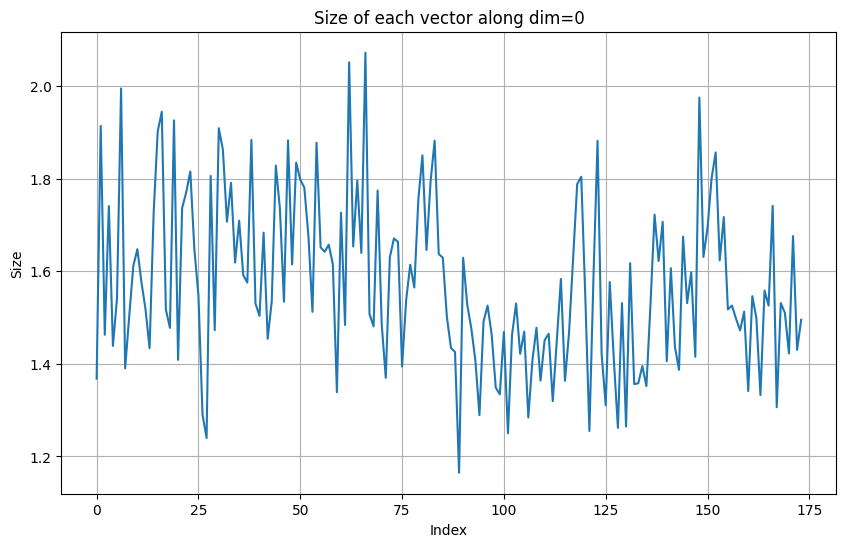

In [3]:
import torch
import matplotlib.pyplot as plt
import torch
model_path = '/data/jong980812/project/cil/CODA-Prompt/result/mini-ssv2/144_10task_coda_0.3ssv2/models/repeat-1/task-10/class.pth'
model = torch.load(model_path)
# print(model)
weights =model['module.last.weight']
weights[:84]/=2.
sizes = torch.norm(weights, dim=1)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sizes.numpy())
plt.xlabel('Index')
plt.ylabel('Size')
plt.title('Size of each vector along dim=0')
plt.grid(True)
plt.show()

OrderedDict([('module.last.weight', tensor([[-0.0216, -0.0347, -0.0808,  ...,  0.0776,  0.0364,  0.0085],
        [-0.0709,  0.0567, -0.0467,  ..., -0.0723, -0.1362, -0.0458],
        [-0.0223,  0.0123,  0.0823,  ..., -0.0872,  0.0492, -0.0642],
        ...,
        [ 0.0306,  0.0817,  0.0558,  ...,  0.0352,  0.0477, -0.0769],
        [ 0.0057, -0.0768, -0.0181,  ...,  0.0624, -0.1161,  0.0781],
        [-0.0054, -0.0713,  0.0769,  ..., -0.1040, -0.1194,  0.0014]])), ('module.last.bias', tensor([ 0.0499, -0.0762,  0.0469, -0.0328,  0.0136, -0.0187, -0.1019,  0.0343,
         0.0056, -0.0005,  0.0021,  0.0131,  0.0214,  0.0282, -0.0230, -0.0335,
        -0.0566,  0.0002, -0.0112, -0.0601,  0.0413, -0.0204, -0.0547, -0.0455,
        -0.0314,  0.0193,  0.0643,  0.0569, -0.0474,  0.0157, -0.0995, -0.0413,
        -0.0543, -0.0226, -0.0373,  0.0202, -0.0520, -0.0065, -0.1176, -0.0382,
         0.0359, -0.0706,  0.0401,  0.0163, -0.0226,  0.0013,  0.0274, -0.0222,
        -0.0040, -0.0242, -

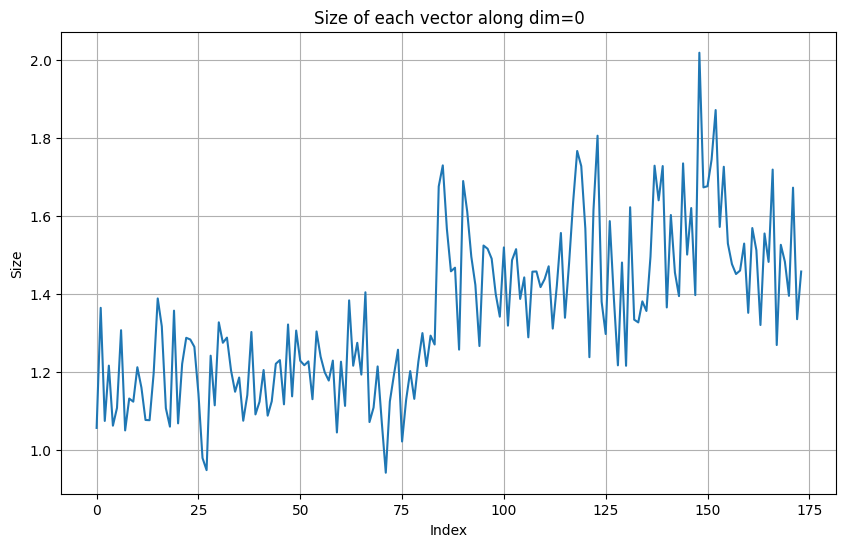

In [8]:
import torch
import matplotlib.pyplot as plt
import torch
model_path = '/data/jong980812/project/cil/CODA-Prompt/result/mini-ssv2/144_10task_coda_0.3_first10epoch/models/repeat-1/task-10/class.pth'
model = torch.load(model_path)
print(model)
weights =model['module.last.weight']
weights[:84]/=2.0
sizes = torch.norm(weights, dim=1)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sizes.numpy())
plt.xlabel('Index')
plt.ylabel('Size')
plt.title('Size of each vector along dim=0')
plt.grid(True)
plt.show()